In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
# load data
rand_search_output = np.load('random_search_output.npy')
result = pd.DataFrame(rand_search_output, columns=['Model_Num', 'Description', 'Validation_RMSE']) 

In [8]:
pd.options.display.max_colwidth = 1010
result.sort_values('Validation_RMSE').head()

,Model_Num,Description,Validation_RMSE
91,92,ConvLayer-5-Filter-8-64-64-96-128-DenseLayer-2-Neuron-96-32-DropoutLayer-0.00-Activation-PReLU,1.955190703528268
24,25,ConvLayer-5-Filter-28-64-64-64-256-DenseLayer-2-Neuron-96-96-DropoutLayer-0.00-Activation-relu,1.9595165484292167
19,20,ConvLayer-5-Filter-8-32-64-128-256-DenseLayer-2-Neuron-96-96-DropoutLayer-0.00-Activation-relu,1.9775424017224994
58,59,ConvLayer-5-Filter-8-32-128-64-256-DenseLayer-2-Neuron-64-128-DropoutLayer-0.00-Activation-PReLU,1.9776926027025494
49,50,ConvLayer-5-Filter-16-32-96-64-128-DenseLayer-1-Neuron-96-0-DropoutLayer-0.00-Activation-relu,1.9957137489318848


In [9]:
parameter = []
for i in range(result.shape[0]):
    par = result['Description'][i].split('-')
    parameter.append(par)

In [13]:
parameter_df = pd.DataFrame(parameter, columns=['remove1','n_conv_layer','remove2','filter1','filter2','filter3','filter4','filter5','remove3','n_dense_layer','remove4','neuron1','neuron2','remove5','dropout','remove6','activation'])

In [16]:
parameter_df.drop(columns=['remove1','remove2','remove3','remove4','remove5','remove6'], inplace=True)

In [17]:
parameter_df.head()

,n_conv_layer,filter1,filter2,filter3,filter4,filter5,n_dense_layer,neuron1,neuron2,dropout,activation
0,3,28,28,64,0,0,2,128,128,0.00,drop_activation
1,4,16,28,96,128,0,1,256,0,0.00,randomized_relu
2,5,8,32,128,96,256,2,64,32,0.00,relu
3,3,28,32,128,0,0,1,64,0,0.00,LeakyReLU
4,3,28,28,64,0,0,1,256,0,0.00,relu


In [18]:
result2 = pd.concat([result, parameter_df], axis=1)

In [19]:
result2.head()

,Model_Num,Description,Validation_RMSE,n_conv_layer,filter1,filter2,filter3,filter4,filter5,n_dense_layer,neuron1,neuron2,dropout,activation
0,1,ConvLayer-3-Filter-28-28-64-0-0-DenseLayer-2-Neuron-128-128-DropoutLayer-0.00-Activation-drop_activation,2.206572147096906,3,28,28,64,0,0,2,128,128,0.00,drop_activation
1,2,ConvLayer-4-Filter-16-28-96-128-0-DenseLayer-1-Neuron-256-0-DropoutLayer-0.00-Activation-randomized_relu,2.2464510686056953,4,16,28,96,128,0,1,256,0,0.00,randomized_relu
2,3,ConvLayer-5-Filter-8-32-128-96-256-DenseLayer-2-Neuron-64-32-DropoutLayer-0.00-Activation-relu,2.2190891333988736,5,8,32,128,96,256,2,64,32,0.00,relu
3,4,ConvLayer-3-Filter-28-32-128-0-0-DenseLayer-1-Neuron-64-0-DropoutLayer-0.00-Activation-LeakyReLU,2.5826294817243305,3,28,32,128,0,0,1,64,0,0.00,LeakyReLU
4,5,ConvLayer-3-Filter-28-28-64-0-0-DenseLayer-1-Neuron-256-0-DropoutLayer-0.00-Activation-relu,2.457849260057722,3,28,28,64,0,0,1,256,0,0.00,relu


In [27]:
result2['Validation_RMSE'] = result2['Validation_RMSE'].astype(float)

In [28]:
result2['Validation_RMSE'].mean()

2.3464978591733066

In [50]:
group_activation = result2.groupby('activation')['Validation_RMSE'].mean()
group_activation

activation
LeakyReLU          2.477025
PReLU              2.235025
drop_activation    2.270841
randomized_relu    2.362754
relu               2.360527
Name: Validation_RMSE, dtype: float64

In [47]:
group_conv_layer = result2.groupby('n_conv_layer')['Validation_RMSE'].mean()
group_conv_layer

n_conv_layer
2    2.673213
3    2.423291
4    2.216832
5    2.150855
Name: Validation_RMSE, dtype: float64

In [48]:
group_dense_layer = result2.groupby('n_dense_layer')['Validation_RMSE'].mean()
group_dense_layer

n_dense_layer
1    2.419166
2    2.279253
Name: Validation_RMSE, dtype: float64

In [38]:
result2['dropout_layer'] = (result2['dropout']!='0.00')

In [49]:
group_dropout = result2.groupby('dropout_layer')['Validation_RMSE'].mean()
group_dropout

dropout_layer
False    2.324616
True     5.147373
Name: Validation_RMSE, dtype: float64

In [56]:
group_activation

activation
LeakyReLU          2.477025
PReLU              2.235025
drop_activation    2.270841
randomized_relu    2.362754
relu               2.360527
Name: Validation_RMSE, dtype: float64

In [68]:
group_activation2 = group_activation.to_frame().reset_index()
group_conv_layer2 = group_conv_layer.to_frame().reset_index()
group_dense_layer2 = group_dense_layer.to_frame().reset_index()
group_dropout2 = group_dropout.to_frame().reset_index()

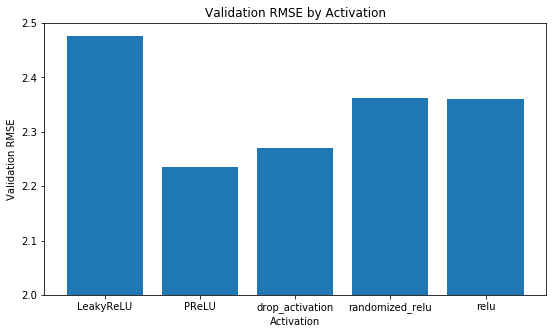

In [76]:
fig = plt.subplots(figsize=(9, 5))
plt.bar(group_activation2['activation'], group_activation2['Validation_RMSE'])
plt.xlabel('Activation', fontsize=10)
plt.ylabel('Validation RMSE', fontsize=10)
plt.title('Validation RMSE by Activation')
plt.ylim([2,2.5])
plt.show()

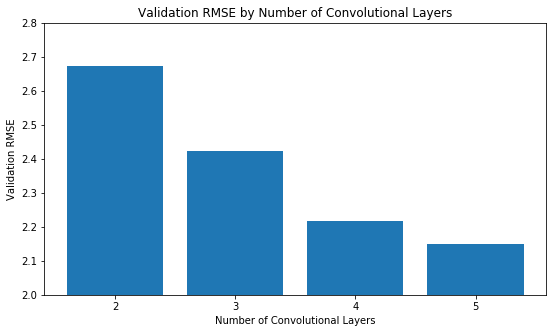

In [74]:
fig = plt.subplots(figsize=(9, 5))
plt.bar(group_conv_layer2['n_conv_layer'], group_conv_layer2['Validation_RMSE'])
plt.xlabel('Number of Convolutional Layers', fontsize=10)
plt.ylabel('Validation RMSE', fontsize=10)
plt.title('Validation RMSE by Number of Convolutional Layers')
plt.ylim([2,2.8])
plt.show()

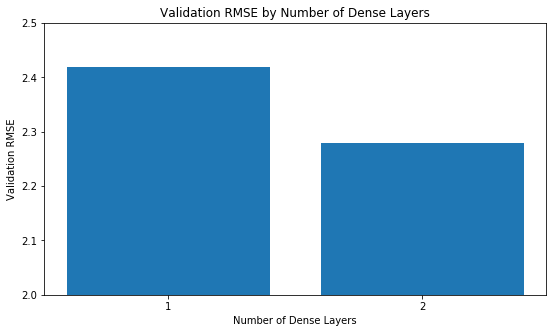

In [78]:
fig = plt.subplots(figsize=(9, 5))
plt.bar(group_dense_layer2['n_dense_layer'], group_dense_layer2['Validation_RMSE'])
plt.xlabel('Number of Dense Layers', fontsize=10)
plt.ylabel('Validation RMSE', fontsize=10)
plt.title('Validation RMSE by Number of Dense Layers')
plt.ylim([2,2.5])
plt.show()

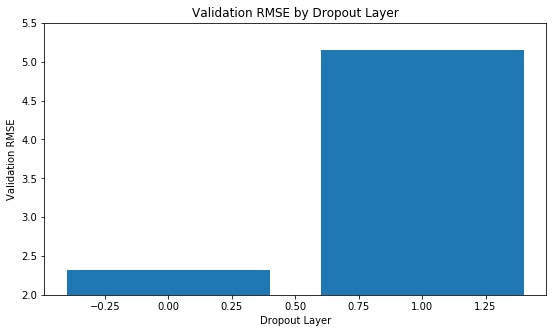

In [83]:
fig = plt.subplots(figsize=(9, 5))
plt.bar(group_dropout2['dropout_layer'], group_dropout2['Validation_RMSE'])
plt.xlabel('Dropout Layer', fontsize=10)
plt.ylabel('Validation RMSE', fontsize=10)
plt.title('Validation RMSE by Dropout Layer')
plt.ylim([2,5.5])
plt.show()